# 重采样数据

下采样降低了信号的采样率或样本大小。在本教程中，当通过拖动和缩放调整图形时，信号会被下采样。

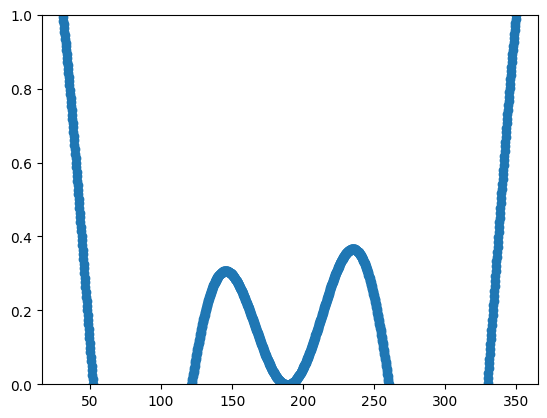

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# A class that will downsample the data and recompute when zoomed.
class DataDisplayDownsampler:
    def __init__(self, xdata, ydata):
        self.origYData = ydata
        self.origXData = xdata
        self.max_points = 50
        self.delta = xdata[-1] - xdata[0]

    def downsample(self, xstart, xend):
        # get the points in the view range
        mask = (self.origXData > xstart) & (self.origXData < xend)
        # dilate the mask by one to catch the points just outside
        # of the view range to not truncate the line
        mask = np.convolve([1, 1, 1], mask, mode='same').astype(bool)
        # sort out how many points to drop
        ratio = max(np.sum(mask) // self.max_points, 1)

        # mask data
        xdata = self.origXData[mask]
        ydata = self.origYData[mask]

        # downsample data
        xdata = xdata[::ratio]
        ydata = ydata[::ratio]

        print(f"using {len(ydata)} of {np.sum(mask)} visible points")

        return xdata, ydata

    def update(self, ax):
        # Update the line
        lims = ax.viewLim
        if abs(lims.width - self.delta) > 1e-8:
            self.delta = lims.width
            xstart, xend = lims.intervalx
            self.line.set_data(*self.downsample(xstart, xend))
            ax.figure.canvas.draw_idle()


# Create a signal
xdata = np.linspace(16, 365, (365-16)*4)
ydata = np.sin(2*np.pi*xdata/153) + np.cos(2*np.pi*xdata/127)

d = DataDisplayDownsampler(xdata, ydata)

fig, ax = plt.subplots()

# Hook up the line
d.line, = ax.plot(xdata, ydata, 'o-')
ax.set_autoscale_on(False)  # Otherwise, infinite loop

# Connect for changing the view limits
ax.callbacks.connect('xlim_changed', d.update)
ax.set_xlim(16, 365)
plt.show()